# Scraping: shanghairanking 

In [48]:
from bs4 import BeautifulSoup
from IPython.display import IFrame
import requests
import pandas as pd
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
IFrame('http://www.shanghairanking.com/rankings/arwu/2008', width = 800, height = 400)

## Generel idea: how to scrape the site?

In [4]:
website = 'http://www.shanghairanking.com/rankings/arwu/2008'
reponse = requests.get(website)
soup = BeautifulSoup(reponse.content, 'html.parser')


In [5]:
# Get table content 
table = soup.find("table")

In [10]:
# Get the headers of tab
headers = [header.text for header in table.find_all('th')]
relevant_headers  = [headers[i] for i in [0, 1, 4]] 
relevant_headers.append("Alumni")
relevant_headers

[' World\nRank ', '\nInstitution\n', 'Total Score ', 'Alumni']

In [19]:
# Get the rows 
rows = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    rows.append(cols)
rows_mod = rows[1:] # Remove row without information 
print("Before deletion of elements\n", rows_mod[0:2])
rows_mod = [[sublist[0], sublist[1], sublist[4], sublist[5]] for sublist in rows_mod] # Select specific elements
rows_mod = [[element.split("\n")[1] if "\n" in element 
             else element for element in sublist] for sublist in rows_mod] # Remove repeated Uni information 

print("After deletion of elements\n", rows_mod[0:2])


Before deletion of elements
 [['1', 'Harvard University\n Harvard University', '', '1', '100.0', '100.0'], ['2', 'Stanford University\n Stanford University', '', '2', '73.7', '40.0']]
After deletion of elements
 [['1', ' Harvard University', '100.0', '100.0'], ['2', ' Stanford University', '73.7', '40.0']]


In [20]:
# Transform data into dictionary, then in dataframe 
dic = {}
for header in relevant_headers:
    dic[header] = [country[relevant_headers.index(header)] for country in rows_mod if len(country) > relevant_headers.index(header)]

# Dataframe 
data = pd.DataFrame(dic)
data.head()

,World\nRank,\nInstitution\n,Total Score,Alumni
0,1,Harvard University,100.0,100.0
1,2,Stanford University,73.7,40.0
2,3,"University of California, Berkeley",71.4,69.0
3,4,University of Cambridge,70.4,90.3
4,5,Massachusetts Institute of Technology (MIT),69.6,71.0


## Now get all sites at one

In [27]:
base = "http://www.shanghairanking.com/rankings/arwu/"
years = list(range(2003, 2024))
dfs = []
for i in years: 

    
    # Get html file of website 
    time.sleep(1) # make a short break 
    website = base + str(i)
    reponse = requests.get(website)
    soup = BeautifulSoup(reponse.content, 'html.parser')

    
    # Get the relevant area of the html file 
    table = soup.find("table")

    ## Get the headers of table
    headers = [header.text for header in table.find_all('th')]
    relevant_headers  = [headers[i] for i in [0, 1, 4]] 
    relevant_headers.append("Alumni")

    ## Get the rows of table 
    rows = []
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        rows.append(cols)
    rows_mod = rows[1:] # Remove row without information 
    rows_mod = [[sublist[0], sublist[1], sublist[4], sublist[5]] for sublist in rows_mod] # Select specific elements
    rows_mod = [[element.split("\n")[1] if "\n" in element 
             else element for element in sublist] for sublist in rows_mod] # Remove repeated Uni information 


   # Transfrom the data into dataframe
    dic = {}
    for header in relevant_headers:
        dic[header] = [country[relevant_headers.index(header)] for country in rows_mod if len(country) > relevant_headers.index(header)]
    data = pd.DataFrame(dic)
    data["Year"] = i 

    
    # Add the dataframes together 
    dfs.append(data) 
shanghai_dataframe = pd.concat(dfs, ignore_index = True) 

In [30]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd

base = "http://www.shanghairanking.com/rankings/arwu/"
years = list(range(2003, 2024))
dfs = []

for i in years:
    # Get HTML file of website
    time.sleep(1)  # Make a short break
    website = base + str(i)
    response = requests.get(website)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Get the relevant area of the HTML file
    table = soup.find("table")

    # Get the headers of the table
    headers = [header.text for header in table.find_all('th')]
    relevant_headers = [headers[i] for i in [0, 1, 4]]
    relevant_headers.append("Alumni")

    # Get the rows of the table
    rows = []
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        rows.append(cols)
    rows_mod = rows[1:]  # Remove rows without information
    rows_mod = [[sublist[0], sublist[1], sublist[4], sublist[5]] for sublist in rows_mod]  # Select specific elements
    rows_mod = [[element.split("\n")[1] if "\n" in element else element for element in sublist] for sublist in rows_mod]  # Remove repeated Uni information

    # Transform the data into a DataFrame
    dic = {}
    for header in relevant_headers:
        dic[header] = [country[relevant_headers.index(header)] for country in rows_mod if len(country) > relevant_headers.index(header)]
    data = pd.DataFrame(dic)
    data["Year"] = i

    # Append the dataframes to the list
    dfs.append(data)

# Concatenate all dataframes
shanghai_dataframe = pd.concat(dfs, ignore_index=True)


In [37]:
shanghai_dataframe.rename(columns={shanghai_dataframe.columns[1]: "Institution"}, inplace=True)
shanghai_dataframe.rename(columns={shanghai_dataframe.columns[0]: "World_Rank"}, inplace=True)

pd.concat([shanghai_dataframe.head(), shanghai_dataframe.tail()], ignore_index = True)

,World_Rank,Institution,Total Score,Alumni,Year
0,1,Harvard University,100.0,100.0,2003
1,2,Stanford University,83.5,76.2,2003
2,3,California Institute of Technology,76.3,72.9,2003
3,4,"University of California, Berkeley",74.0,75.0,2003
4,5,University of Cambridge,73.4,91.1,2003
5,26,University of Michigan-Ann Arbor,37.8,37.4,2023
6,27,The University of Tokyo,37.7,36.6,2023
7,28,New York University,37.3,26.7,2023
8,29,Peking University,36.7,10.5,2023
9,30,Northwestern University,35.8,12.8,2023


In [46]:
shanghai_dataframe["World_Rank"] = shanghai_dataframe["World_Rank"].astype("int64")

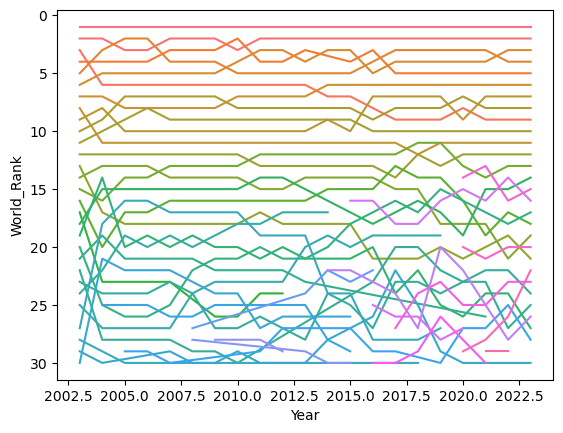

In [56]:
# Visualization of the dataframe
sns.lineplot(x="Year", y="World_Rank", hue="Institution", data=shanghai_dataframe)
plt.gca().invert_yaxis()

# Remove the legend 
plt.legend().remove()

# Display the plot
plt.show()

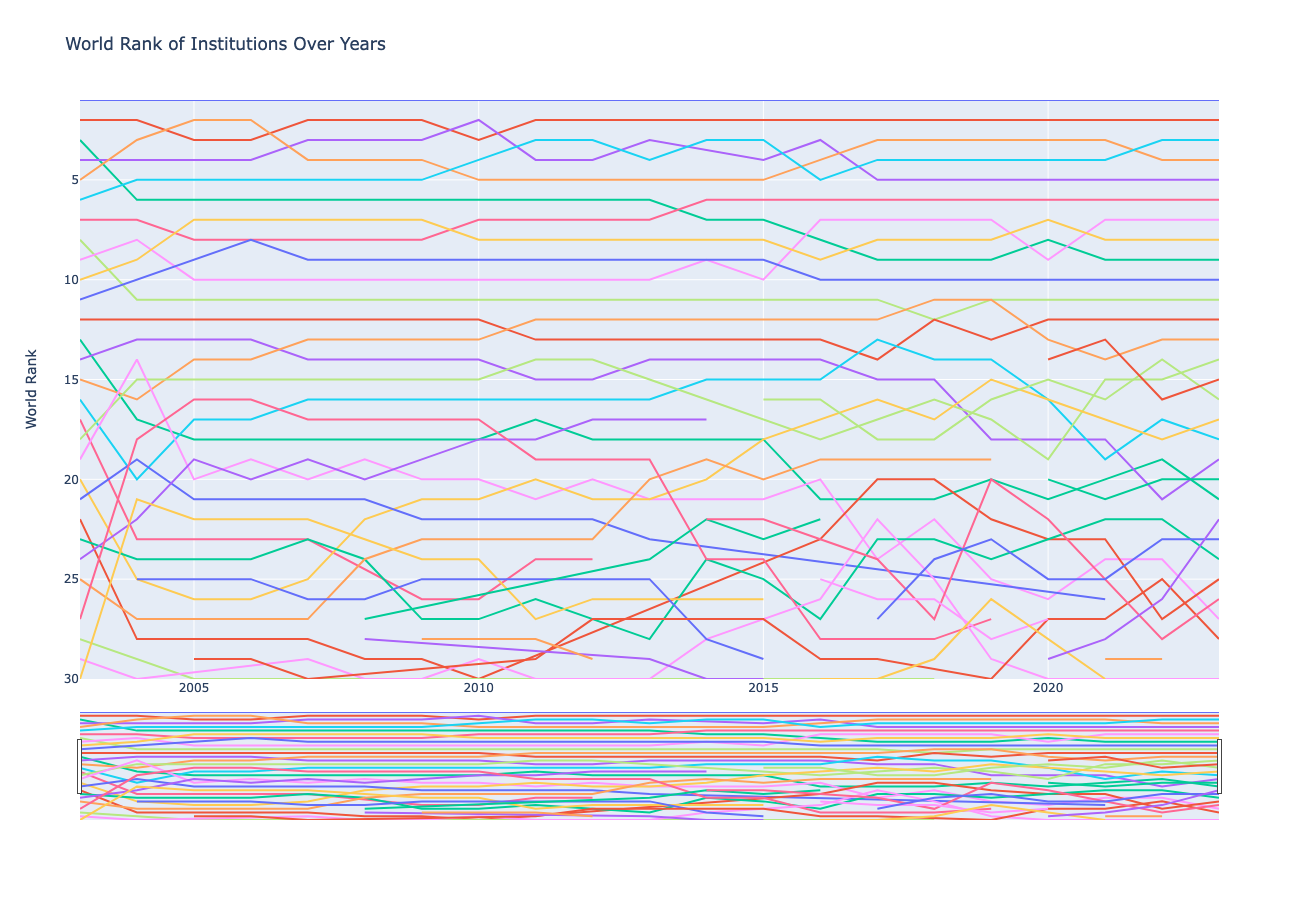

In [60]:
import plotly.express as px



fig = px.line(shanghai_dataframe, x="Year", y="World_Rank", color="Institution",
              title="World Rank of Institutions Over Years",
              labels={"World_Rank": "World Rank", "Year": "Year"})

# Determine the lower bound for the y-axis (maximum World Rank value)
max_world_rank = shanghai_dataframe['World_Rank'].max()


fig.update_layout(
    hovermode='closest',
    xaxis_title='',  # Removes the x-axis label
    yaxis_title='World Rank',
    yaxis=dict(autorange=False, range=[max_world_rank, 1]),  # Set fixed y-axis range with 1 as the highest number
    showlegend=False,  # Removes the legend
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"  #
    ),
    height=900  # Adjustment of height
)

# Show the figure
fig.show()
